In [16]:
import pandas as pd
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt
from statistics import mean
import math

from math import log


In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [18]:
pkl_file = open('2019-12-14_18-05-55.pkl', 'rb')
mydata = pickle.load(pkl_file)
#pkl_file.close()

In [19]:
#(mydata['ch0'])
#mydata


In [20]:
mydata['ch0'].shape #(row,col)

(12500, 2000)

In [21]:
baseline=np.average((mydata['ch0'][2,:250]))
baseline

0.6054141414140886

In [22]:
mydata['ch0'][2:250] # zero row and 250 col , colm represent bins

array([[ 1.41414141e-01, -5.85858586e+00,  6.14141414e+00, ...,
        -1.57858586e+02, -1.43858586e+02, -1.43858586e+02],
       [ 2.24545455e+01,  2.54545455e+01,  2.14545455e+01, ...,
        -1.75454545e+01, -1.45454545e+01, -2.55454545e+01],
       [-6.45454545e+00, -4.54545455e-01,  5.54545455e+00, ...,
        -4.54545455e-01,  2.54545455e+00, -8.45454545e+00],
       ...,
       [-4.00000000e+00,  5.00000000e+00,  2.00000000e+00, ...,
        -9.00000000e+00, -1.30000000e+01, -8.00000000e+00],
       [-2.28282828e+00,  5.71717172e+00, -2.28282828e+00, ...,
        -1.82828283e+01, -2.12828283e+01, -2.42828283e+01],
       [ 3.37373737e+00, -7.62626263e+00,  1.13737374e+01, ...,
         3.73737374e-01, -6.26262626e-01, -1.62626263e+00]])

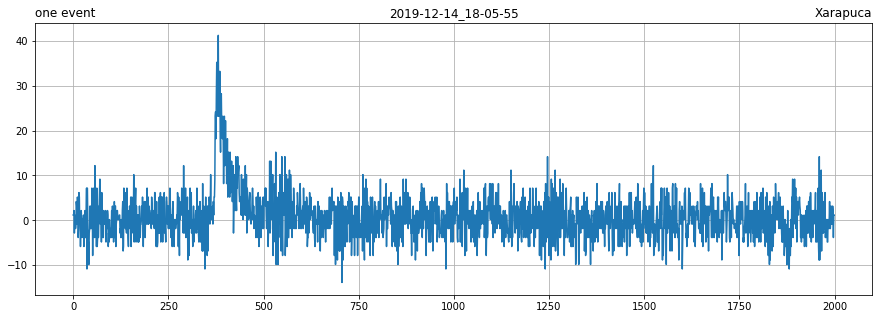

In [23]:
data=(mydata['ch0'][5])
plt.plot((data))
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
#plt.yscale('log')
plt.grid(True)
#t = np.arange(len(data))
#plt.xlim(1250, 1500)
#plt.ylim(-5, 200)
plt.show()

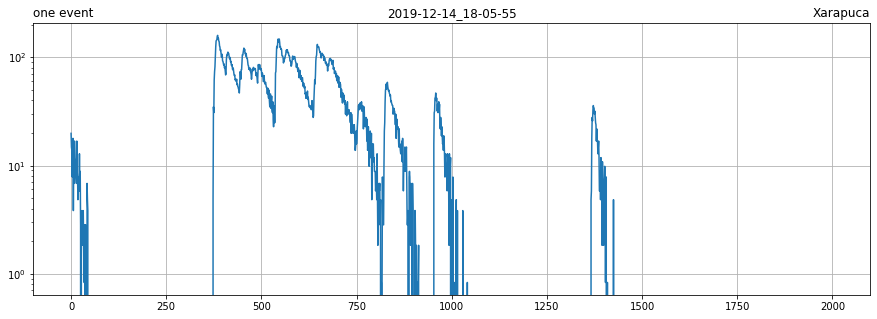

In [24]:
data=(mydata['ch1'][3]-baseline)
plt.plot((data))
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
plt.yscale('log')
plt.grid(True)
#t = np.arange(len(data))
#plt.xlim(0, 2000)
#\plt.ylim(0.01, 5000)
#plt.plot(t,data)
plt.show()

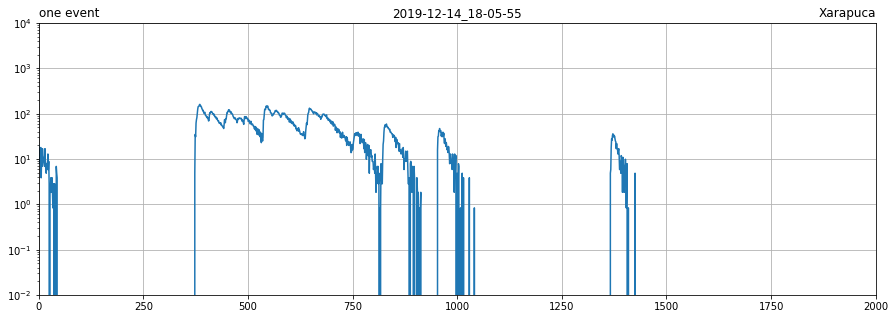

In [25]:
#plt.plot((data))
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
plt.yscale('log')
plt.grid(True)
t = np.arange(len(data))
plt.xlim(0, 2000)
plt.ylim(0.01, 10000)
plt.plot(t,data)
plt.show()

In [26]:
from sklearn.preprocessing import normalize
norm3 = data / np.norm(data)

norm1 = data / np.linalg.norm(data)
norm2 = normalize(data[:,np.newaxis], axis=0).ravel()
print (np.all(norm1 == norm2))
print(norm1)
#plt.plot((data))
plt.title('2019-12-14_18-05-55')
plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
plt.yscale('log')
plt.grid(True)
t = np.arange(len(data))
#plt.xlim(0, 2000)
#plt.ylim(0.01, 10000)
plt.plot(norm2)
plt.show()

AttributeError: module 'numpy' has no attribute 'norm'

In [27]:
avrg=np.average(data[350:700])
avrg

75.58892929292935

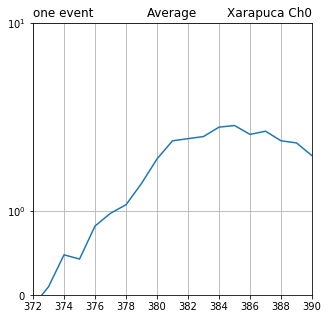

In [14]:
plt.plot(data/avrg)
plt.title('Average')
plt.title('one event', loc='left')
plt.title('Xarapuca Ch0', loc='right')
plt.grid(True)
plt.yscale('symlog')
plt.xlim(372, 390)
plt.ylim(0, 10)
plt.show()

In [15]:
from IPython.display import Image

## fit
    coeffs[0] is B (noise)
    coeffs[1] is A (amplitude)
    coeffs[2] is \mu (center)
    coeffs[3] is \sigma (width)
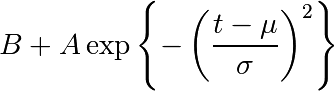
x0 = np.array([3, 30, 15, 1], dtype=float)

In [16]:
def model(t, coeffs):
    return coeffs[0] + coeffs[1] * np.exp( - ((t-coeffs[2])/coeffs[3])**2 )



In [17]:
x0 = np.array([1, 10, 750, 1], dtype=float)

In [18]:
def residuals(coeffs, y, t):
    return y - model(t, coeffs)


In [19]:
from scipy.optimize import leastsq
x, flag = leastsq(residuals, x0, args=(data/avrg, t))
print (x)

[-1.44473371e-01  1.33320712e+00  5.70620475e+02  2.19834836e+02]


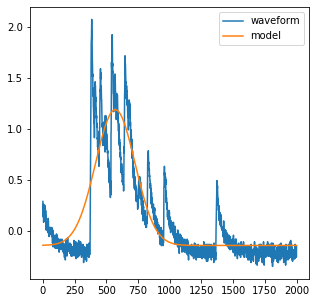

In [20]:
plt.plot(t, data/avrg, t, model(t, x)) 
plt.legend(['waveform', 'model']) 
plt.show() 

In [21]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [22]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

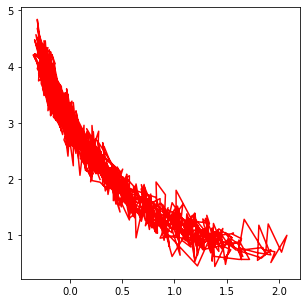

In [23]:
xdata = data/avrg
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'r-', label='data')


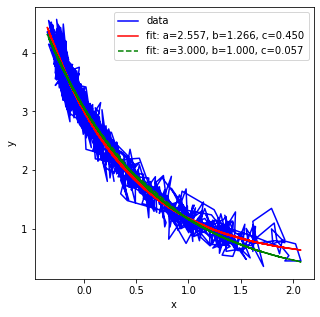

In [24]:
xdata = data/avrg
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
#popt
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [25]:
popt

array([3.        , 1.        , 0.05747622])

In [26]:
from scipy.signal import find_peaks
peaks,_=find_peaks(data,height=0)
peaks

array([   5,    7,    9,   15,   19,   22,   24,   29,   32,   36,   38,
         40,   42,   47,   53,   60,   62,   67,   70,   78,  374,  385,
        387,  393,  397,  402,  404,  409,  412,  414,  418,  420,  423,
        426,  430,  432,  435,  437,  441,  444,  450,  454,  456,  460,
        468,  470,  476,  479,  484,  487,  492,  495,  499,  502,  507,
        511,  517,  520,  523,  527,  530,  533,  541,  544,  547,  550,
        552,  559,  566,  568,  571,  582,  585,  587,  593,  597,  601,
        604,  607,  611,  614,  616,  618,  621,  623,  627,  630,  633,
        640,  647,  650,  655,  659,  663,  665,  670,  673,  675,  681,
        683,  688,  690,  693,  697,  700,  703,  706,  710,  714,  717,
        720,  722,  726,  728,  730,  735,  737,  740,  744,  749,  755,
        757,  759,  761,  763,  766,  770,  775,  778,  781,  786,  789,
        791,  793,  796,  801,  804,  807,  809,  811,  813,  815,  818,
        828,  831,  835,  839,  841,  848,  853,  8

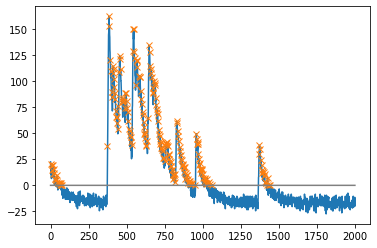

In [27]:
%matplotlib inline
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(np.zeros_like(data),"-",color="gray")
plt.show()

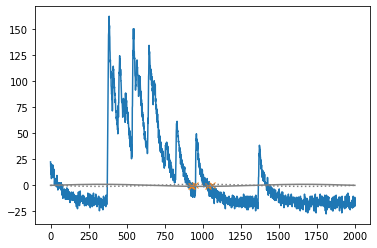

In [28]:


border=np.sin(np.linspace(0,3*np.pi,data.size))
peaks,_=find_peaks(data,height=[border,-border])
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(border,"-",color="gray")
plt.plot(-border,":",color="gray")
plt.show()



In [29]:
peaks,_=find_peaks(data,distance=150)
np.diff(peaks)
print(peaks)

[   5  195  385  544  697  958 1108 1372 1524 1739 1953]


In [30]:
from scipy.signal import peak_prominences
peaks_all,_=find_peaks(data)
prominences,left_base,right_base=peak_prominences(data,peaks_all)
print(prominences)

[ 10.   5.  13.  13.   2.   8.   3.   6.   6.   2.   6.   3.  11.   3.
   1.   7.   1.   7.   2.   1.   3.   7.   3.   1.  10.   7.   7.   9.
   1.   9.   2.  11.   1.  10.   3.   2.   7.   7.   1.   3.   2.   5.
  10.   1.   1.   6.  10.   6.   3.   1.   2.   6.   6.   7.  10.  10.
   6.  13.   5.  13.   7.  17.   1.   1.   5.   3.   8.   2.   6.   2.
   4.   7.   7.   6.   3.   2.  12.   6.   5.  11.  11.   6.   1.  11.
   9.   1.  14.   6.   2.   6.   3.  11.   2.   7.   1.   4.   4.   2.
  10.   5.   7.  11.   1.  11.   8.   5.   7.   2.  10.   2.   7.   3.
   5.   9.   4. 187.   3.   2.   6.   2.   2.   1.  43.   1.   3.   1.
   2.   3.   1.   1.   3.   1.   1.  11.   1.  75.   5.   6.   1.   3.
   3.  18.   2.   4.  28.  28.   2.   5.   8.   2.   6.   8.  11.  10.
   8.  11.   4. 125. 125.   2.   1.   1.   4.  29.   1.  20.   6.   6.
   7.   6.  11.   5.   5.   4.   2.   1.   5.   7.   2.   1.   1.   7.
   5. 104.   2.   1.  10.   1.   8.   3.   1.   3.  23.   2.   8.   3.
   4. 

In [31]:
#https://github.com/mjDelta/scipy.signal-Study-Records
from sklearn.cluster import KMeans
clf=KMeans(n_clusters=2).fit(np.expand_dims(prominences,1))
y=clf.predict(np.expand_dims(prominences,1))
print(set(y))
centers=clf.cluster_centers_
print(centers)

{0, 1}
[[ 6.0292599]
 [99.875    ]]


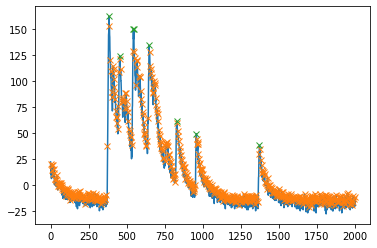

In [32]:
plt.plot(data)
plt.plot(peaks_all[y==False],data[peaks_all[y==False]],"x")
plt.plot(peaks_all[y==True],data[peaks_all[y==True]],"x")
plt.show()

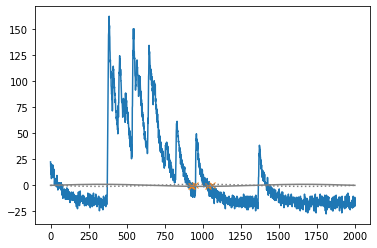

In [33]:
border=np.sin(np.linspace(0,3*np.pi,data.size))
peaks,_=find_peaks(data,height=[border,-border])
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(border,"-",color="gray")
plt.plot(-border,":",color="gray")
plt.show()

In [34]:
from scipy import signal
x_detrended = signal.detrend(sig)
plt.plot(x_detrended)

NameError: name 'sig' is not defined

In [35]:
peak_freq = sample_freq[power.argmax()]
peak_freq

NameError: name 'sample_freq' is not defined

In [36]:
sig.mean()

NameError: name 'sig' is not defined

In [37]:
a = np.ma.array([1., 2., 3., 4.], mask=[False, False, True, True])

In [38]:
a = np.ma.array([1., 2., 3., 4.], mask=[False, False, True, True])

x = np.ma.arange(6.).reshape(3, 2)

In [39]:
x

masked_array(
  data=[[0., 1.],
        [2., 3.],
        [4., 5.]],
  mask=False,
  fill_value=1e+20)

In [40]:
avg, sumweights = np.ma.average(x, axis=0, weights=[1, 2, 3],returned=True)

In [41]:
avg

masked_array(data=[2.6666666666666665, 3.6666666666666665],
             mask=[False, False],
       fill_value=1e+20)